In [1]:
"""
Running the code from
https://www.youtube.com/watch?v=YHz0PHcuJnk&ab_channel=Dr.DataScience

this implementation is NOT the one used in lecture slides,
change it to the correct implementation:

1. use L = D - W instead of M = D^(-1/2).K.D^(-1/2)
2. use eigenvector decomposition instead of SVD
"""

'\nRunning the code from\nhttps://www.youtube.com/watch?v=YHz0PHcuJnk&ab_channel=Dr.DataScience\n\nthis implementation is NOT the one used in lecture slides,\nchange it to the correct implementation:\n\n1. use L = D - W instead of M = D^(-1/2).K.D^(-1/2)\n2. use eigenvector decomposition instead of SVD\n'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import sys
sys.path.append("..")
from SpectralClustering import MySpectralClustering

Text(0.5, 1.0, 'Labels returned by KMeans')

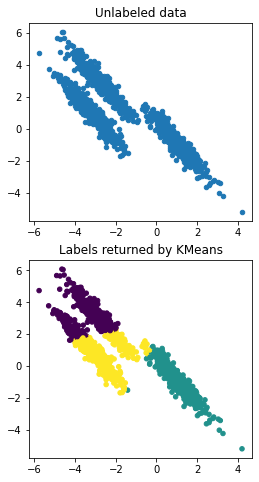

In [3]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
X_aniso = np.dot(X, transformation)

plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=20)
plt.title("Unlabeled data")

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot(212)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=y_pred, s=20)
plt.title("Labels returned by KMeans")

In [25]:
from scipy.spatial import distance
rbf_param = 7.6
# Find M
K = np.exp(-rbf_param * distance.cdist(X_aniso, X_aniso, metric="sqeuclidean"))

In [26]:
print(K.shape)

(1500, 1500)


In [33]:
D = K.sum(axis=1)
print(D.shape)
D = np.sqrt(1/D)
M = np.multiply(D[np.newaxis,:], np.multiply(K, D[:,np.newaxis]))
print(np.multiply(K, D[:,np.newaxis]).shape)
print(M.shape)
ch = linalg.cholesky(M)

(1500,)
(1500, 1500)
(1500, 1500)


LinAlgError: 849-th leading minor of the array is not positive definite

In [30]:
from scipy import linalg
from sklearn.preprocessing import normalize

# EVD of M
U, Sigma, _ = linalg.svd(M, full_matrices=False, lapack_driver="gesvd")
Usubset = U[:,0:3]

In [31]:
y_pred_sc = KMeans(n_clusters=3).fit_predict(normalize(Usubset))
print(y_pred_sc.shape)

(1500,)


Text(0.5, 1.0, 'Labels returned by spectral clustering')

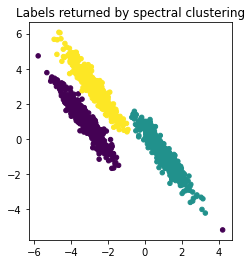

In [32]:
plt.figure(figsize=(8,4))
plt.subplot(211)
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=20)
plt.title("Unlabeled data")

plt.subplot(122)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=y_pred_sc, s=20)
plt.title("Labels returned by spectral clustering")

In [21]:
mysc = MySpectralClustering(1)
mysc.fit(X_aniso, 3)

In [22]:
mylabels = mysc.labels
print(mylabels.shape)

(1500,)


Text(0.5, 1.0, 'Labels returned by MySpectralClustering')

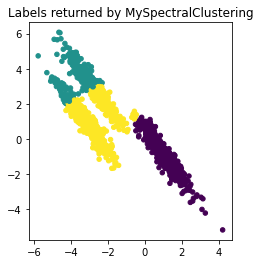

In [23]:
plt.figure(figsize=(8,4))
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=20)
plt.title("Unlabeled data")

plt.subplot(122)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=mylabels, s=20)
plt.title("Labels returned by MySpectralClustering")

In [13]:
def fit(X, k):
    dist_pairs = distance.cdist(X, X, metric="sqeuclidean")
    W = np.exp(-1 * dist_pairs)